In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import math
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
##### Problem
in_dim = 8
out_dim = 1

In [4]:
class MLayerNN(nn.Module):
    def __init__(self, in_dim, out_dim, depth, N_params):
        super(MLayerNN, self).__init__()
        
        # Initialize layer sizes list
        layer_dims = [in_dim]  # First layer is input dim
        h = int(N_params / ((in_dim + out_dim) * (depth)))
        while (in_dim * h + (depth-3) * h**2 + h * out_dim) > N_params:
            h -= 1
        layer_dims += [int(h)] * (depth - 2)  # Set all hidden layers to hidden_dim
        layer_dims.append(out_dim)  # Last layer is output dim
        print(layer_dims)
        self.layers = nn.ModuleList([
            nn.Linear(layer_dims[i-1], layer_dims[i]) for i in range(1,depth)
        ])
        self.params = sum(p.numel() for p in self.parameters() if p.ndimension() > 1)
        self.activation = nn.ReLU()
    def forward(self, x):
        for layer in self.layers[:-1]:
            x = self.activation(layer(x))  # Apply ReLU activation
        return self.layers[-1](x)  # Final layer without activation

In [5]:
# Load dataset
california_housing = fetch_california_housing(as_frame=True)
X = california_housing.data.values  # Convert DataFrame to NumPy array
y = california_housing.target.values.reshape(-1, 1)  # Reshape target to match PyTorch format

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features for better training stability
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders with batch size
batch_size = 1024  # Set batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
batch_test = 1
test_loader = DataLoader(test_dataset, batch_size=batch_test, shuffle=False)
# Check a sample batch
for batch in train_loader:
    X_batch, y_batch = batch
    print(f"Batch X shape: {X_batch.shape}, Batch y shape: {y_batch.shape}")
    break  # Print only one batch for verification



Batch X shape: torch.Size([1024, 8]), Batch y shape: torch.Size([1024, 1])


In [ ]:
@torch.no_grad()
def compute_test_loss(test_loader, model):
    criterion = torch.nn.MSELoss()
    running_loss = 0.
    for batch, target in test_loader:
        outputs = model(batch)
        loss = criterion(target, outputs)
        running_loss += loss.item()
    return running_loss / len(test_loader)

6
[8, 50, 50, 50, 50, 1]
paramters: 8192 7950
Epoch [1/1000], Loss: 4.655224,test: 3.732190, lr: 0.001000
Epoch [2/1000], Loss: 2.492033,test: 1.785777, lr: 0.001000
Epoch [3/1000], Loss: 1.308731,test: 0.976298, lr: 0.001000
Epoch [4/1000], Loss: 0.844086,test: 0.756938, lr: 0.001000
Epoch [5/1000], Loss: 0.712753,test: 0.677094, lr: 0.001000
Epoch [6/1000], Loss: 0.628929,test: 0.603956, lr: 0.001000
Epoch [7/1000], Loss: 0.568818,test: 0.542197, lr: 0.001000
Epoch [8/1000], Loss: 0.501372,test: 0.501604, lr: 0.001000
Epoch [9/1000], Loss: 0.472954,test: 0.477603, lr: 0.001000
Epoch [10/1000], Loss: 0.449232,test: 0.463096, lr: 0.001000
Epoch [11/1000], Loss: 0.437010,test: 0.445575, lr: 0.001000
Epoch [12/1000], Loss: 0.418147,test: 0.431459, lr: 0.001000
Epoch [13/1000], Loss: 0.412977,test: 0.419665, lr: 0.001000
Epoch [14/1000], Loss: 0.395124,test: 0.409954, lr: 0.001000
Epoch [15/1000], Loss: 0.385646,test: 0.398169, lr: 0.001000
Epoch [16/1000], Loss: 0.381683,test: 0.392413, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.138103,test: 0.306229, lr: 0.001000


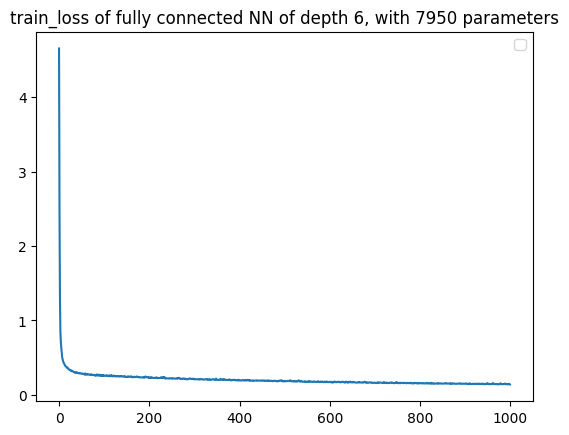

Training Complete!
[8, 72, 72, 72, 72, 1]
paramters: 16384 16200
Epoch [1/1000], Loss: 4.239285,test: 2.541959, lr: 0.001000
Epoch [2/1000], Loss: 1.865173,test: 1.420419, lr: 0.001000
Epoch [3/1000], Loss: 1.179450,test: 0.900406, lr: 0.001000
Epoch [4/1000], Loss: 0.804891,test: 0.725610, lr: 0.001000
Epoch [5/1000], Loss: 0.665740,test: 0.637965, lr: 0.001000
Epoch [6/1000], Loss: 0.596590,test: 0.564582, lr: 0.001000
Epoch [7/1000], Loss: 0.522199,test: 0.505944, lr: 0.001000
Epoch [8/1000], Loss: 0.467551,test: 0.464987, lr: 0.001000
Epoch [9/1000], Loss: 0.442370,test: 0.437544, lr: 0.001000
Epoch [10/1000], Loss: 0.411186,test: 0.422690, lr: 0.001000
Epoch [11/1000], Loss: 0.405875,test: 0.414962, lr: 0.001000
Epoch [12/1000], Loss: 0.394173,test: 0.399217, lr: 0.001000
Epoch [13/1000], Loss: 0.387866,test: 0.393213, lr: 0.001000
Epoch [14/1000], Loss: 0.380848,test: 0.388542, lr: 0.001000
Epoch [15/1000], Loss: 0.372683,test: 0.380945, lr: 0.001000
Epoch [16/1000], Loss: 0.3690

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.113438,test: 0.330744, lr: 0.001000


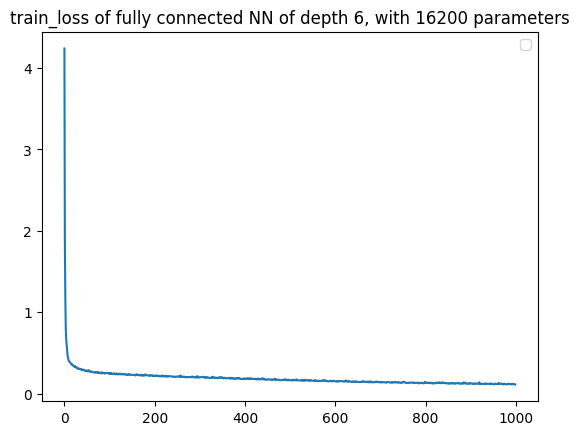

Training Complete!
[8, 103, 103, 103, 103, 1]
paramters: 32768 32754
Epoch [1/1000], Loss: 3.808748,test: 1.607274, lr: 0.001000
Epoch [2/1000], Loss: 1.302500,test: 0.852938, lr: 0.001000
Epoch [3/1000], Loss: 0.762978,test: 0.702186, lr: 0.001000
Epoch [4/1000], Loss: 0.645537,test: 0.594890, lr: 0.001000
Epoch [5/1000], Loss: 0.538064,test: 0.518802, lr: 0.001000
Epoch [6/1000], Loss: 0.477446,test: 0.470004, lr: 0.001000
Epoch [7/1000], Loss: 0.434883,test: 0.436432, lr: 0.001000
Epoch [8/1000], Loss: 0.405575,test: 0.417595, lr: 0.001000
Epoch [9/1000], Loss: 0.395731,test: 0.398287, lr: 0.001000
Epoch [10/1000], Loss: 0.379514,test: 0.385582, lr: 0.001000
Epoch [11/1000], Loss: 0.372703,test: 0.377571, lr: 0.001000
Epoch [12/1000], Loss: 0.360277,test: 0.371140, lr: 0.001000
Epoch [13/1000], Loss: 0.360471,test: 0.367061, lr: 0.001000
Epoch [14/1000], Loss: 0.348946,test: 0.360484, lr: 0.001000
Epoch [15/1000], Loss: 0.344179,test: 0.368526, lr: 0.001000
Epoch [16/1000], Loss: 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.080018,test: 0.345014, lr: 0.001000


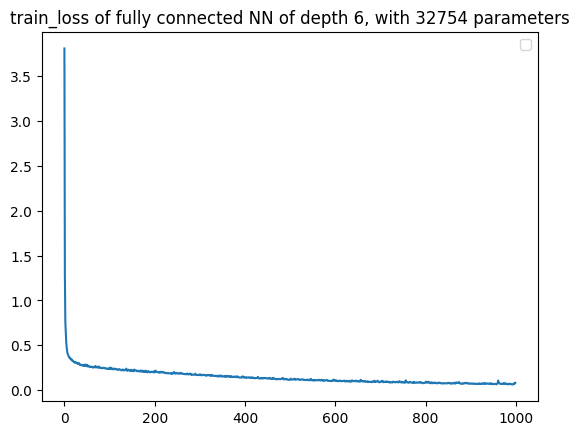

Training Complete!
[8, 146, 146, 146, 146, 1]
paramters: 65536 65262
Epoch [1/1000], Loss: 3.502777,test: 1.551964, lr: 0.001000
Epoch [2/1000], Loss: 1.080947,test: 0.757085, lr: 0.001000
Epoch [3/1000], Loss: 0.696868,test: 0.650901, lr: 0.001000
Epoch [4/1000], Loss: 0.586436,test: 0.540753, lr: 0.001000
Epoch [5/1000], Loss: 0.493263,test: 0.481324, lr: 0.001000
Epoch [6/1000], Loss: 0.438812,test: 0.446807, lr: 0.001000
Epoch [7/1000], Loss: 0.425886,test: 0.427947, lr: 0.001000
Epoch [8/1000], Loss: 0.405650,test: 0.415885, lr: 0.001000
Epoch [9/1000], Loss: 0.383503,test: 0.396383, lr: 0.001000
Epoch [10/1000], Loss: 0.376865,test: 0.387423, lr: 0.001000
Epoch [11/1000], Loss: 0.367217,test: 0.375454, lr: 0.001000
Epoch [12/1000], Loss: 0.361823,test: 0.371038, lr: 0.001000
Epoch [13/1000], Loss: 0.349834,test: 0.363358, lr: 0.001000
Epoch [14/1000], Loss: 0.341234,test: 0.357095, lr: 0.001000
Epoch [15/1000], Loss: 0.338889,test: 0.348806, lr: 0.001000
Epoch [16/1000], Loss: 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.035478,test: 0.353698, lr: 0.001000


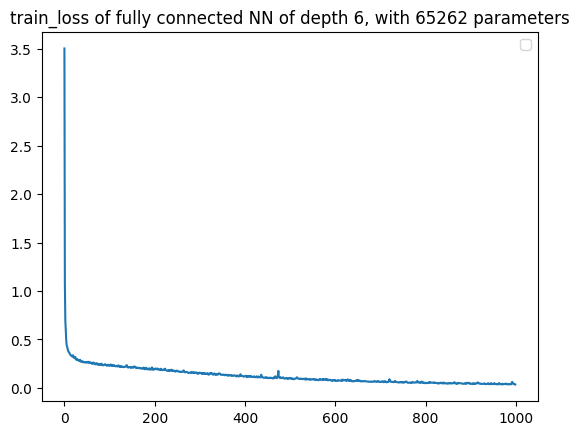

Training Complete!
[8, 207, 207, 207, 207, 1]
paramters: 131072 130410
Epoch [1/1000], Loss: 2.710917,test: 1.205554, lr: 0.001000
Epoch [2/1000], Loss: 0.909147,test: 0.681918, lr: 0.001000
Epoch [3/1000], Loss: 0.623450,test: 0.567169, lr: 0.001000
Epoch [4/1000], Loss: 0.500471,test: 0.477740, lr: 0.001000
Epoch [5/1000], Loss: 0.445092,test: 0.438329, lr: 0.001000
Epoch [6/1000], Loss: 0.405719,test: 0.411757, lr: 0.001000
Epoch [7/1000], Loss: 0.389495,test: 0.391086, lr: 0.001000
Epoch [8/1000], Loss: 0.381693,test: 0.379152, lr: 0.001000
Epoch [9/1000], Loss: 0.362096,test: 0.369007, lr: 0.001000
Epoch [10/1000], Loss: 0.359988,test: 0.359264, lr: 0.001000
Epoch [11/1000], Loss: 0.349067,test: 0.357031, lr: 0.001000
Epoch [12/1000], Loss: 0.336765,test: 0.346739, lr: 0.001000
Epoch [13/1000], Loss: 0.329061,test: 0.347626, lr: 0.001000
Epoch [14/1000], Loss: 0.322220,test: 0.345812, lr: 0.001000
Epoch [15/1000], Loss: 0.324314,test: 0.385349, lr: 0.001000
Epoch [16/1000], Loss: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.026015,test: 0.360334, lr: 0.001000


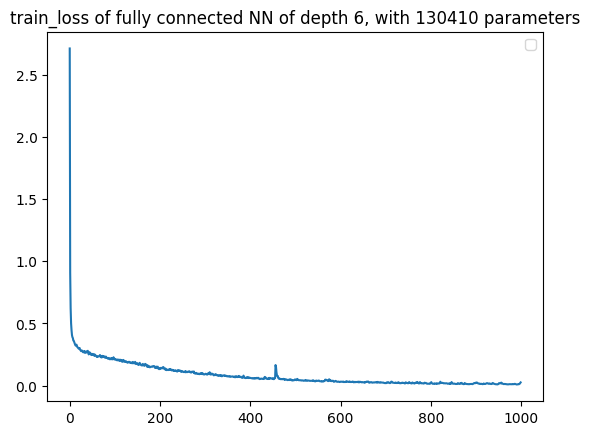

Training Complete!


In [ ]:
import time
samples_train = 16512
test_losses = []
train_losses = []
models = []
Numbers_paramters = []
max_depth = 2
for j in range(1,max_depth):
    depth = 3 + (3 - 1) * j - 2 + 1
    mods = []
    for i in range(3,8):
        params = 2**i * 1024
        model = MLayerNN(in_dim, out_dim, depth = depth , N_params = params)
        if model.params == 0:
            continue
        Numbers_paramters.append(model.params)
        print("paramters:", params, model.params)
        epochs = 1000
        train_loss = []
        test_loss = []
        model.train()
        optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0)
        criterion = torch.nn.MSELoss()
        for epoch in range(epochs):
            running_loss = 0.0 
            for batch, target in train_loader:
                start_time = time.time()
                optimizer.zero_grad()
                outputs = model(batch)
                loss = criterion(target, outputs)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            avg_loss = running_loss / len(train_loader)
            test_l = compute_test_loss(test_loader, model)
            test_loss.append(test_l)
            train_loss.append(avg_loss)
            print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.6f},test: {test_l:.6f}, lr: {optimizer.param_groups[0]['lr']:6f}")
        mods.append(model)
        test_losses.append(test_loss)
        train_losses.append(train_loss)
        plt.plot(train_loss)
        plt.title(f'train_loss of fully connected NN of depth {depth}, with {model.params} parameters')
        plt.legend()
        plt.show()
        print("Training Complete!")
    models.append(mods)

In [8]:
models

[[MLayerNN(
    (layers): ModuleList(
      (0): Linear(in_features=8, out_features=50, bias=True)
      (1-3): 3 x Linear(in_features=50, out_features=50, bias=True)
      (4): Linear(in_features=50, out_features=1, bias=True)
    )
    (activation): ReLU()
  ),
  MLayerNN(
    (layers): ModuleList(
      (0): Linear(in_features=8, out_features=72, bias=True)
      (1-3): 3 x Linear(in_features=72, out_features=72, bias=True)
      (4): Linear(in_features=72, out_features=1, bias=True)
    )
    (activation): ReLU()
  ),
  MLayerNN(
    (layers): ModuleList(
      (0): Linear(in_features=8, out_features=103, bias=True)
      (1-3): 3 x Linear(in_features=103, out_features=103, bias=True)
      (4): Linear(in_features=103, out_features=1, bias=True)
    )
    (activation): ReLU()
  ),
  MLayerNN(
    (layers): ModuleList(
      (0): Linear(in_features=8, out_features=146, bias=True)
      (1-3): 3 x Linear(in_features=146, out_features=146, bias=True)
      (4): Linear(in_features=146,

In [ ]:
import dill 
with open("CC_house_NN.dill", "wb") as f:
    dill.dump(models, f)